(checkerboard-nb)=
# Checkerboard tight-binding model

This example shows how to define a simple two-dimensional checkerboard
tight-binding model with first neighbour hopping only.

In [1]:
from pythtb.tb_model import TBModel
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat = [[1.0, 0.0], [0.0, 1.0]]
# define coordinates of orbitals
orb = [[0.0, 0.0], [0.5, 0.5]]

# make two dimensional tight-binding checkerboard model
my_model = TBModel(2, 2, lat, orb)

# set model parameters
delta = 1.1
t = 0.6

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 1, 0, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
my_model.set_hop(t, 1, 0, [1, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [   0   ,  1.000 ]
Orbital vectors (dimensionless):
  # 0 ===> [   0   ,    0   ]
  # 1 ===> [ 0.500 ,  0.500 ]
Site energies:
  # 0 ===> -1.100 
  # 1 ===>  1.100 
Hoppings:
  < 1 | H | 0 + [ 0.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 0.0 ,  1.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 1.0 ,  1.0 ] >  ===> 0.6000 
Hopping distances:
  | pos(1) - pos(0 + [ 0.0 ,  0.0 ]) | =  0.707 
  | pos(1) - pos(0 + [ 1.0 ,  0.0 ]) | =  0.707 
  | pos(1) - pos(0 + [ 0.0 ,  1.0 ]) | =  0.707 
  | pos(1) - pos(0 + [ 1.0 ,  1.0 ]) | =  0.707 


## Band structure calculation

We will now calculate the band structure of the checkerboard model by solving the tight-binding Hamiltonian on a grid of k-points in the Brillouin zone.

In [3]:
path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
label = (r"$\Gamma $", r"$X$", r"$M$", r"$\Gamma $")
(k_vec, k_dist, k_node) = my_model.k_path(path, 301)

----- k_path report -----
Real-space lattice vectors:
 [[1. 0.]
 [0. 1.]]
K-space metric tensor:
 [[1. 0.]
 [0. 1.]]
Nodes (reduced coords):
 [[0.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [0.  0. ]]
Reciprocal-space vectors:
 [[1. 0.]
 [0. 1.]]
Nodes (Cartesian coords):
 [[0.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [0.  0. ]]
Segments:
  Node 0 [0. 0.] to Node 1 [0.  0.5]: distance = 0.50000
  Node 1 [0.  0.5] to Node 2 [0.5 0.5]: distance = 0.50000
  Node 2 [0.5 0.5] to Node 3 [0. 0.]: distance = 0.70711
Node distances (cumulative): [0.      0.5     1.      1.70711]
Node indices in path: [  0  88 176 300]
-------------------------


Now solve for eigenenergies of the Hamiltonian on the set of k-points from above

In [4]:
evals = my_model.solve_ham(k_vec)

Plot the band structure

:::{tip}
You can use the [TBModel.plot_band_structure](#pythtb.TBModel.plot_band_structure) method to visualize the band structure to avoid re-implementing the matplotlib code. This method takes the k-point mesh as an argument and produces a plot of the energy bands.
:::

Text(0, 0.5, 'Band energy')

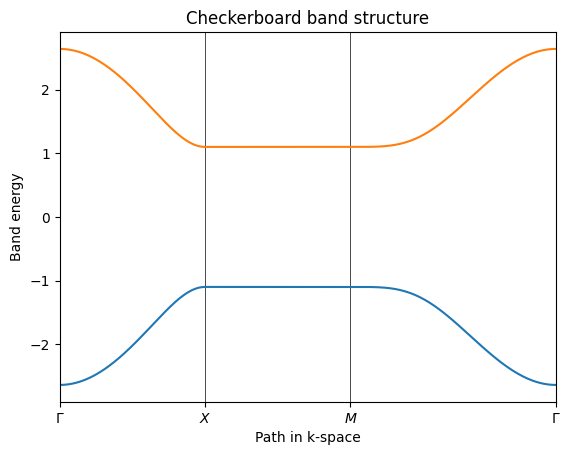

In [5]:
fig, ax = plt.subplots()

ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color="k")

ax.plot(k_dist, evals)

ax.set_title("Checkerboard band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")